In [1]:
import scanpy as sc
import graph_tool.all as gt
import scnsbm
import pickle
import pandas as pd
import anndata
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
adatae=sc.read('../scRNA_paga/state_adata/MARSseq_equilibrate.h5ad')
adatae2=sc.read('../scRNA_paga/state_adata/MARSseq_equilibrate2.h5ad')
adatae3=sc.read('../scRNA_paga/state_adata/MARSseq_equilibrate3.h5ad')
adatam=sc.read('../scRNA_paga/state_adata/MARSseq_minimize.h5ad')
adatam2=sc.read('../scRNA_paga/state_adata/MARSseq_minimize2.h5ad')
adatam3=sc.read('../scRNA_paga/state_adata/MARSseq_minimize3.h5ad')


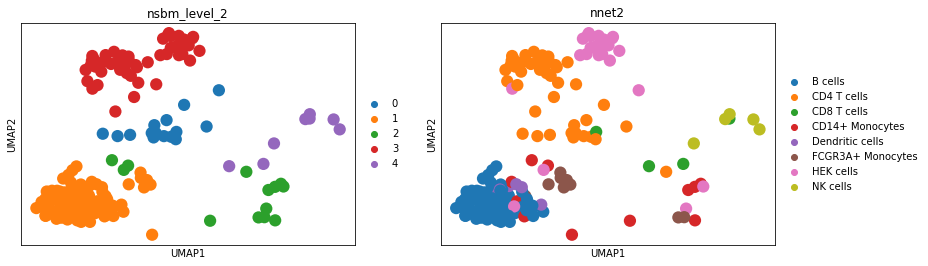

In [3]:
M=adatam.uns['nsbm']['cell_affinity']['2']
adatam.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam[adatam.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

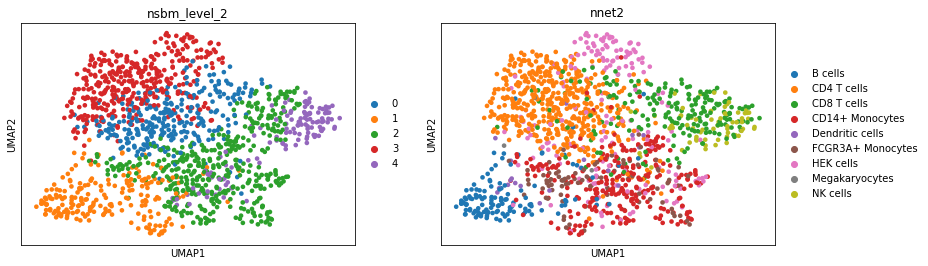

In [4]:
sc.pl.umap(adatam, color=['nsbm_level_2','nnet2'])

Trying to set attribute `.uns` of view, copying.


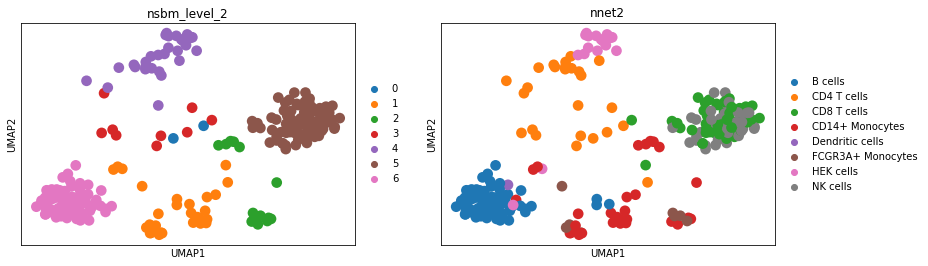

In [5]:
M=adatam2.uns['nsbm']['cell_affinity']['2']
adatam2.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam2[adatam2.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

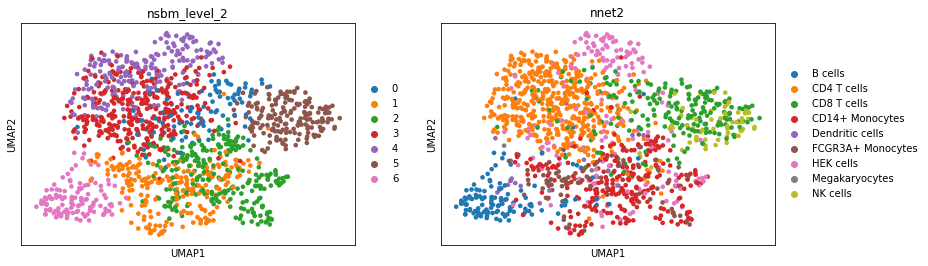

In [6]:
sc.pl.umap(adatam2, color=['nsbm_level_2','nnet2'])

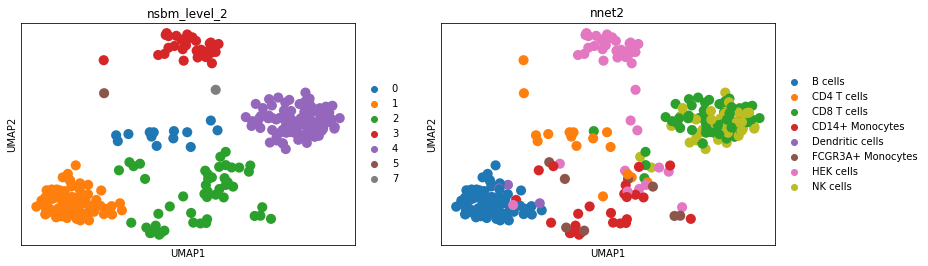

In [21]:
M=adatam3.uns['nsbm']['cell_affinity']['2']
adatam3.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adatam3[adatam3.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

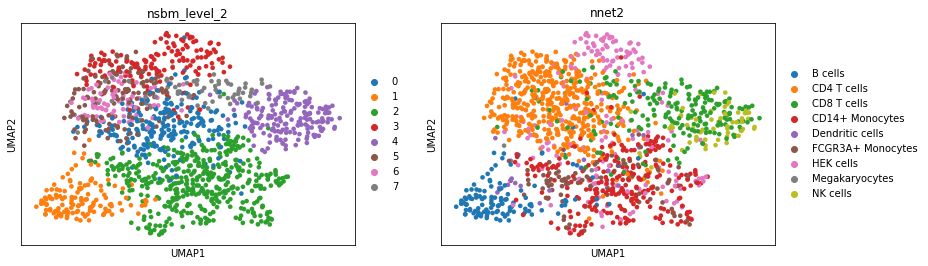

In [22]:
sc.pl.umap(adatam3, color=['nsbm_level_2','nnet2'])

In [9]:
ciao2=adatam2[adatam2.obs.max_u < 1e-100]

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.tl.rank_genes_groups(ciao2, groupby='nsbm_level_2', method='logreg',max_iter=500)

Trying to set attribute `.uns` of view, copying.


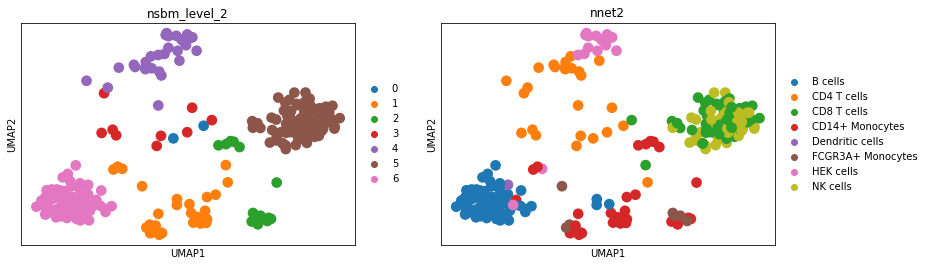

In [11]:
sc.pl.umap(ciao2, color=['nsbm_level_2','nnet2'])

In [12]:
for x in ciao2.uns['rank_genes_groups']['names']['2']:
    print(x)

AP000662.1
PCDH19
BCRP3
AC097462.2
ICE1
AC090559.1
TUBGCP4
LAMP2
SIGLEC5
KRAS
BBC3
SPIN1
AL096711.2
DHRS1
S100A9
GSK3B
AC005614.2
EPS8L1
AL358472.5
MUTYH
SLC35C2
DUSP2
SEPTIN6
L3MBTL2
NUP214
FP671120.5
LINC02610
CCDC13
SAMD13
CAPS
SDHAF4
EDRF1
PVR
OSBPL2
CDK5
RIPK4
ISCA2
TMEM259
VANGL2
NIPBL
DUX4L32
TBC1D9B
BANP
CD82
THOP1
CMTR1
PKD2L1
EFHD2
LINC00607
ATP9B
GDPD5
SFRP1
CTTNBP2
COA7
TRIML2
AC012485.1
ARHGEF7
ATPAF1
PLEKHH2
ZNF689
WSB1
RPS6KA5
RIPOR1
ENPP2
ADGRG5
GEMIN5
ATF6B
AC068234.1
MT1X
SCUBE3
DLST
NT5DC1
DEF8
SS18
ITGA1
GYG2P1
ROCK1
ARPC4-TTLL3
HEXB
RASA1
BUB1B
TXNDC11
PIM1
SLC46A3
AC003666.1
CCDC136
TRMT44
AL392172.1
CAST
CDK5RAP2
MEF2D
FAM76B
IRF7
ZNF613
SACM1L
INTU
CROCCP2
CAPS2-AS1
MCAM
HPS5


In [13]:
ciao2.uns['rank_genes_groups']['scores']['2']

array([0.02887395, 0.02821657, 0.02805568, 0.02738645, 0.02693197,
       0.02504235, 0.02499492, 0.02481223, 0.02447761, 0.0239152 ,
       0.02387352, 0.0224034 , 0.02145397, 0.02141978, 0.02135297,
       0.02131711, 0.0208828 , 0.02058635, 0.02046174, 0.02045616,
       0.02042815, 0.02034023, 0.02014514, 0.01965625, 0.01952815,
       0.0193896 , 0.01930474, 0.01925375, 0.01907117, 0.01906266,
       0.01880266, 0.01876462, 0.01870122, 0.0185717 , 0.01830109,
       0.01817627, 0.01809659, 0.01809062, 0.01806399, 0.0179165 ,
       0.01790494, 0.01768698, 0.0176524 , 0.01759428, 0.01752457,
       0.0175117 , 0.01746094, 0.01745364, 0.01741697, 0.01737337,
       0.01719031, 0.01717967, 0.0170866 , 0.01698438, 0.01670133,
       0.01669177, 0.0164905 , 0.01647766, 0.01627936, 0.01625134,
       0.01622578, 0.01620917, 0.01619574, 0.01610291, 0.01601566,
       0.01596218, 0.01594253, 0.01593003, 0.01579549, 0.01565367,
       0.01546041, 0.01543839, 0.0154153 , 0.01536418, 0.01536

In [14]:
for x in range(len(ciao2.uns['rank_genes_groups']['names']['2'])):
    print(ciao2.uns['rank_genes_groups']['names']['2'][x]+',' ,ciao2.uns['rank_genes_groups']['scores']['2'][x])

AP000662.1, 0.028873954
PCDH19, 0.02821657
BCRP3, 0.028055677
AC097462.2, 0.027386453
ICE1, 0.026931966
AC090559.1, 0.025042346
TUBGCP4, 0.024994921
LAMP2, 0.024812233
SIGLEC5, 0.024477607
KRAS, 0.023915203
BBC3, 0.023873521
SPIN1, 0.022403404
AL096711.2, 0.02145397
DHRS1, 0.021419784
S100A9, 0.021352965
GSK3B, 0.021317113
AC005614.2, 0.020882802
EPS8L1, 0.02058635
AL358472.5, 0.020461744
MUTYH, 0.02045616
SLC35C2, 0.020428149
DUSP2, 0.020340228
SEPTIN6, 0.020145144
L3MBTL2, 0.019656248
NUP214, 0.019528149
FP671120.5, 0.019389598
LINC02610, 0.019304736
CCDC13, 0.019253748
SAMD13, 0.019071165
CAPS, 0.019062664
SDHAF4, 0.018802656
EDRF1, 0.018764615
PVR, 0.018701216
OSBPL2, 0.018571695
CDK5, 0.018301088
RIPK4, 0.018176265
ISCA2, 0.01809659
TMEM259, 0.018090622
VANGL2, 0.01806399
NIPBL, 0.017916502
DUX4L32, 0.017904945
TBC1D9B, 0.01768698
BANP, 0.017652396
CD82, 0.01759428
THOP1, 0.017524572
CMTR1, 0.017511701
PKD2L1, 0.01746094
EFHD2, 0.017453643
LINC00607, 0.017416969
ATP9B, 0.017373366

In [3]:
cell_affinity=list()
for i in range(len(adatam.uns['nsbm']['cell_affinity']['2'])):
    val=dict()
    cell=[]
    for j in range(len(adatam.uns['nsbm']['cell_affinity']['2'][i])):
        buff=[x for x in adatam.uns['nsbm']['cell_affinity']['2'][i]]
        if adatam.uns['nsbm']['cell_affinity']['2'][i][j]== max(adatam.uns['nsbm']['cell_affinity']['2'][i]):
            val[j]=val.get('j', adatam.uns['nsbm']['cell_affinity']['2'][i][j])
            buff.pop(j)
        if adatam.uns['nsbm']['cell_affinity']['2'][i][j]<0.95:
            for e in range(len(adatam.uns['nsbm']['cell_affinity']['2'][i])):
                if adatam.uns['nsbm']['cell_affinity']['2'][i][e]== max(buff):
                    val[e]=val.get('j', adatam.uns['nsbm']['cell_affinity']['2'][i][e])        
    cell.append(val)   
    cell_affinity.append(cell)

In [4]:
cell_affinity

[[{0: 0.999999999996517}],
 [{1: 0.9999999997974658}],
 [{1: 0.8688170665460273, 2: 0.08045729749925042}],
 [{2: 0.9999999999999301}],
 [{2: 1.0}],
 [{0: 0.9999362395044056}],
 [{0: 0.9972806327104035}],
 [{3: 1.0}],
 [{0: 0.6230120159346142, 2: 0.3769542766427215}],
 [{2: 0.9999995935872276}],
 [{2: 0.9965879909125567}],
 [{2: 0.999999999992389}],
 [{2: 0.9999999999987252}],
 [{0: 0.999999999999999}],
 [{4: 0.9989244128195033}],
 [{0: 0.9999999605551897}],
 [{2: 0.9999999999601779}],
 [{2: 0.9999999981111805}],
 [{0: 0.9994525176683201}],
 [{2: 0.9999898662559955}],
 [{4: 0.9999973350192415}],
 [{3: 0.9999982178530805}],
 [{0: 0.9999999999945838}],
 [{3: 0.999999902236611}],
 [{4: 0.9999999994192748}],
 [{0: 0.999936055559615}],
 [{2: 0.99999999154529}],
 [{2: 0.9999991382321051}],
 [{3: 0.9815882170998347}],
 [{4: 0.9999999997049001}],
 [{4: 1.0}],
 [{1: 0.8866353449508616, 2: 0.08547460949576766}],
 [{1: 1.0}],
 [{2: 0.9999999999999978}],
 [{4: 0.99999999740337}],
 [{2: 0.9999997787

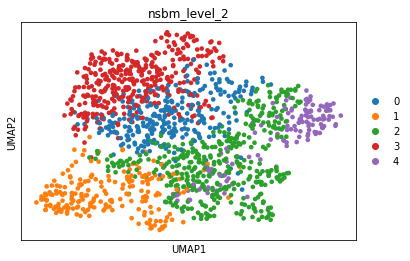

In [15]:
sc.pl.umap(adatam,color='nsbm_level_2')

In [13]:
cell_uncert=list()
for i in range(len(cell_affinity)):
    if len(cell_affinity[i][0])>1:
        cell_uncert.append(cell_affinity[i][0])

In [12]:
len(cell_affinity[8][0])

2

In [16]:
M=adatam.uns['nsbm']['cell_affinitya']['2']

In [17]:
adatam.obs['max_u'] = 1 - np.max(M, axis=1) 

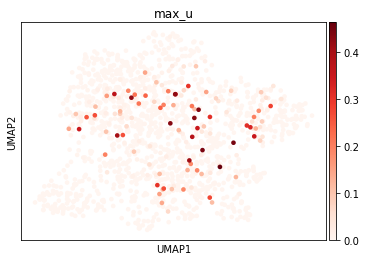

In [18]:
sc.pl.umap(adatam, color ='max_u',color_map='Reds')

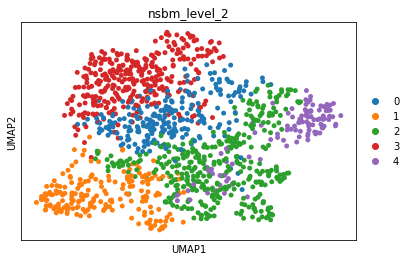

In [32]:
sc.pl.umap(adatam[adatam.obs.max_u < 0.005], color='nsbm_level_2')

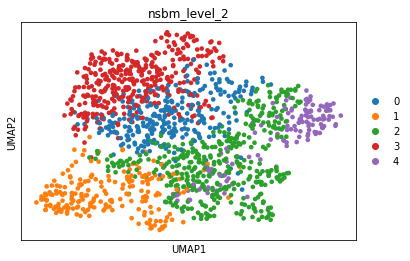

In [21]:
sc.pl.umap(adatam,color='nsbm_level_2')

Trying to set attribute `.uns` of view, copying.


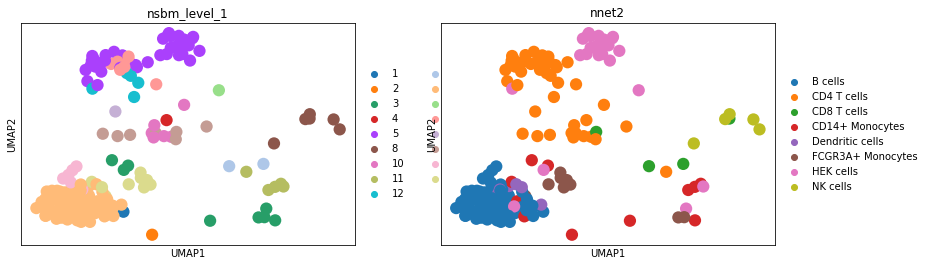

In [42]:
sc.pl.umap(adatam[adatam.obs.max_u < 1e-100], color=['nsbm_level_1','nnet2'])